In [ ]:
"""
Librerías necesarias para que el proyecto funcione
"""
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

!pip install ndlib
!pip install git+http://github.com/GiulioRossetti/ndlib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155690 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 14.5 MB/s 
  Created wheel for libarchi

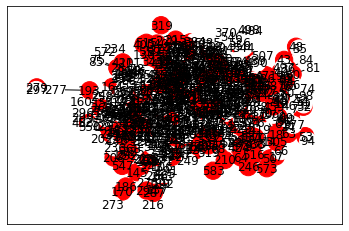

'\nCon este código hemos creado una gráfica con una topología muy parecida \na la realizada con los datos reales\n'

In [ ]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np

"""Comenzamos con la capa de poder
Se crean las redes, la de politica tendrá 100 nodos, 
la gráfica de universidades 200 nodos 
y finalmente la gráfica de las empresas tendrá 300 nodos. 
"""
Grado = 100
G_Politica = nx.dual_barabasi_albert_graph(Grado,2,1,.15, seed=random)
G_Universidades = nx.dual_barabasi_albert_graph(2*Grado,2, 1,.25, seed=random)
G_Empresas = nx.dual_barabasi_albert_graph(3*Grado,2, 1,.35 ,seed=random)

"""
Se genera una red para usarla en la visualización muticapa
"""
G_Poder_sinetiquetas = nx.disjoint_union_all([G_Politica, G_Universidades,G_Empresas])

"""
Se genera un atributo a cada nodo de su red correspondiente, ésto es importante,
ya que más adelante se combinarán todas las gráficas en una sola, llamada G_Poder.
"""

for i in G_Politica.nodes():
    G_Politica.nodes[i]['Tipo'] = 'Politica'
for i in G_Universidades.nodes():
    G_Universidades.nodes[i]['Tipo'] = 'Universidades'
for i in G_Empresas.nodes():
    G_Empresas.nodes[i]['Tipo'] = 'Empresas'

"""
Se combinarán las gráficas para crear la nueva gráfica de poder
"""
G_Poder = nx.disjoint_union_all([G_Politica, G_Universidades,G_Empresas])

#Se generan conexiones aleatorias entre la red, para unir las 3 componentes

for i in range(Grado):
    G_Poder.add_edge(*random.sample(G_Poder.nodes(), 2))


#Se genera aleatoriamente el atributo "honestidad" a cada nodo

for i in G_Poder.nodes():
    G_Poder.nodes[i]['honestidad'] = random.uniform(0, 1)
color_map = []        
for i in G_Poder.nodes():

    if G_Poder.nodes[i]['honestidad'] < 0.5 : 
        color_map.append('red')
    else:
        color_map.append('white')
    
#Se muestra la gráfica
nx.draw_networkx(G_Poder, node_color=color_map, with_labels=True)
plt.draw()
plt.show()

#Activar para guardar el documento como archivo de Gephi
nx.write_gexf( G_Poder , "Poder.gexf" )

"""
Con este código hemos creado una gráfica con una topología muy parecida 
a la realizada con los datos reales
"""


In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt

# Network topology
g= G_Poder

# Model selection
model = ep.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.30)

# Setting node parameters
threshold = 0.5
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(70)

trends = model.build_trends(iterations)
trends
#%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p= viz.plot()


ModuleNotFoundError: ignored

In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology
g= G_Poder

# Model selection
model = ep.ProfileThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('blocked', 0.0)
config.add_model_parameter('adopter_rate', 0.05)
config.add_model_parameter('fraction_infected', 0.30)

# Setting node parameters
threshold = 0.51
profile = 0.5

for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    config.add_node_configuration("profile", i, profile)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(50)

trends = model.build_trends(iterations)
trends
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)


from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

from bokeh.io import curdoc
from bokeh.plotting import figure, output_file, show


curdoc().theme = 'dark_minimal'

output_notebook() # show bokeh in notebook
viz = DiffusionTrend(model, trends)


p = viz.plot(width=600, height=600)


show(p)

viz.plot()


no display found. Using non-interactive Agg backend


Figure(id='1183', ...)

In [ ]:
print("La eficiencia local es")
print(nx.local_efficiency(g))

print("La eficiencia global es")
print(nx.global_efficiency(g))

#Hola Vivi

La eficiencia local es
0.017273572672208647
La eficiencia global es
0.20799468135235913
